In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [ ]:
Path= "/content/drive/MyDrive/Advanced Statistics/Education+-+Post+12th+Standard.csv"
Education= pd.read_csv(Path)

In [ ]:
Education.head()

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [ ]:
Education.shape

(777, 18)

In [ ]:
Education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [ ]:
Education.describe().T

,count,mean,std,min,25%,50%,75%,max
Apps,777.0,3001.638353,3870.201484,81.0,776.0,1558.0,3624.0,48094.0
Accept,777.0,2018.804376,2451.113971,72.0,604.0,1110.0,2424.0,26330.0
Enroll,777.0,779.972973,929.176190,35.0,242.0,434.0,902.0,6392.0
Top10perc,777.0,27.558559,17.640364,1.0,15.0,23.0,35.0,96.0
Top25perc,777.0,55.796654,19.804778,9.0,41.0,54.0,69.0,100.0
F.Undergrad,777.0,3699.907336,4850.420531,139.0,992.0,1707.0,4005.0,31643.0
P.Undergrad,777.0,855.298584,1522.431887,1.0,95.0,353.0,967.0,21836.0
Outstate,777.0,10440.669241,4023.016484,2340.0,7320.0,9990.0,12925.0,21700.0
Room.Board,777.0,4357.526384,1096.696416,1780.0,3597.0,4200.0,5050.0,8124.0
Books,777.0,549.380952,165.105360,96.0,470.0,500.0,600.0,2340.0


###From the above output I can see the maximum numbers for both PhD and Grad.Rate are 103 and 118 respectively. Here PhD denotes to the percentage of faculties with PhD's and Grad.Rate denotes to the graduation rate. Both numbers can not be greater than 100. So here I will fix these anomalies.  

In [ ]:
Education['Grad.Rate'].unique()

array([ 60,  56,  54,  59,  15,  55,  63,  73,  80,  52,  76,  74,  68,
        69, 100,  46,  34,  48,  70,  65,  88,  58,  71,  85,  79,  91,
        72,  84,  49,  82,  35,  51,  75,  53,  96,  67,  18,  33,  97,
        89,  93,  78,  83,  61,  81,  64,  62, 118,  24,  66,  47,  50,
        21,  87,  77,  43,  95,  37,  99,  45,  42,  98,  94,  38,  86,
        44,  22,  57,  29,  36,  39,  40,  26,  90,  92,  32,  27,  41,
        31,  10,  30])

In [ ]:
Education['Grad.Rate'] = Education['Grad.Rate'].replace(118, Education['Grad.Rate'].median())

In [ ]:
Education['Grad.Rate'].describe()

count    777.000000
mean      65.395109
std       17.073737
min       10.000000
25%       53.000000
50%       65.000000
75%       78.000000
max      100.000000
Name: Grad.Rate, dtype: float64

In [ ]:
Education['PhD'].unique()

array([ 70,  29,  53,  92,  76,  67,  90,  89,  79,  40,  82,  73,  60,
        36,  78,  93,  48,  62,  69,  83,  55,  88,  57,  85,  65,  66,
        81,  59,  58,  68,  98,  71,  74,  61,  87,  64,  35,  80,  63,
        75,  39,  99, 100,  95,  77,  72,  10,  86,  22,  50,  41,   8,
        94,  56,  46,  54,  84,  97,  51,  42,  49,  52,  43,  37,  45,
        47,  91,  25,  31,  96,  34,  33,  44,  32,  14, 103,  26,  16])

In [ ]:
Education['PhD'] = Education['PhD'].replace(103, Education['PhD'].median())

In [ ]:
Education['PhD'].describe()

count    777.000000
mean      72.624196
std       16.291967
min        8.000000
25%       62.000000
50%       75.000000
75%       85.000000
max      100.000000
Name: PhD, dtype: float64

In [ ]:
Dups = Education.duplicated()
print('Number of duplicate rows = %d' % (Dups.sum()))

Education[Dups]

Number of duplicate rows = 0


,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate


In [ ]:
Education.isnull().sum()

Names          0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

###Univariate Analysis

###I have used Boxplot and Histogram to analyze the data in each category.

In [ ]:
Education['Apps'].describe()

count      777.000000
mean      3001.638353
std       3870.201484
min         81.000000
25%        776.000000
50%       1558.000000
75%       3624.000000
max      48094.000000
Name: Apps, dtype: float64

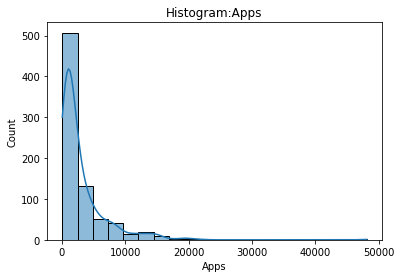

In [ ]:
plt.title('Histogram:Apps')
sns.histplot(data=Education,x='Apps', bins=20, kde=True)
plt.show()

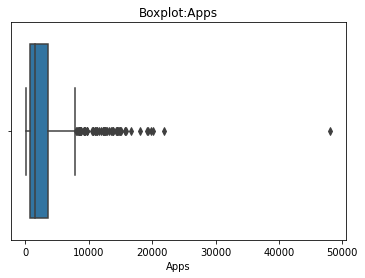

In [ ]:
plt.title('Boxplot:Apps')
sns.boxplot(data=Education,x='Apps')
plt.show()

### The Box plot of Apps variable seems to have outliers. The number of applications received by a college ranges from 81 to 48094. The mean number of applications is 3001 and the median is 1558. The distribution is right skewed.

In [ ]:
Education['Accept'].describe()

count      777.000000
mean      2018.804376
std       2451.113971
min         72.000000
25%        604.000000
50%       1110.000000
75%       2424.000000
max      26330.000000
Name: Accept, dtype: float64

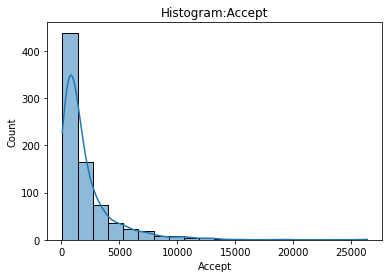

In [ ]:
plt.title('Histogram:Accept')
sns.histplot(data=Education,x='Accept', bins=20, kde=True)
plt.show()

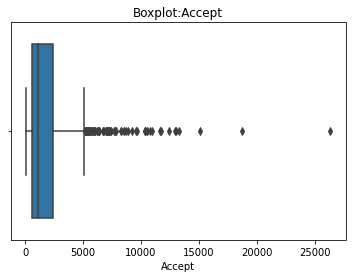

In [ ]:
plt.title('Boxplot:Accept')
sns.boxplot(data=Education,x='Accept')
plt.show()

###The Box plot of Accept variable seems to have outliers. The number of applications accepted by a college ranges from 72 to 26330. The mean number of applications accepted is 2018 and the median is 1110. The distribution is right skewed.

In [ ]:
Education['Enroll'].describe()

count     777.000000
mean      779.972973
std       929.176190
min        35.000000
25%       242.000000
50%       434.000000
75%       902.000000
max      6392.000000
Name: Enroll, dtype: float64

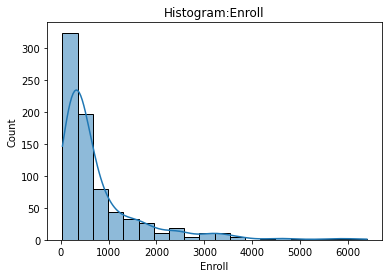

In [ ]:
plt.title('Histogram:Enroll')
sns.histplot(data=Education,x='Enroll', bins=20, kde=True)
plt.show()

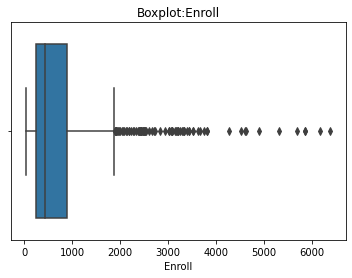

In [ ]:
plt.title('Boxplot:Enroll')
sns.boxplot(data=Education,x='Enroll')
plt.show()

###The box plot of the Enroll variable also has outliers. The number of students who enroll ranges from 35 to 6392. The mean number of students enrolled is 779.97 and the median is 434.The distribution is right skewed. 

In [ ]:
Education['Top10perc'].describe()

count    777.000000
mean      27.558559
std       17.640364
min        1.000000
25%       15.000000
50%       23.000000
75%       35.000000
max       96.000000
Name: Top10perc, dtype: float64

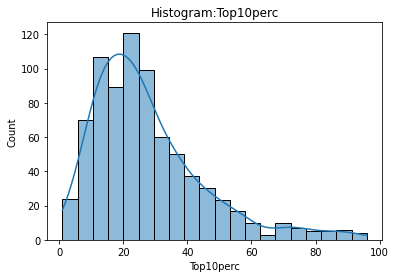

In [ ]:
plt.title('Histogram:Top10perc')
sns.histplot(data=Education,x='Top10perc', bins=20, kde=True)
plt.show()

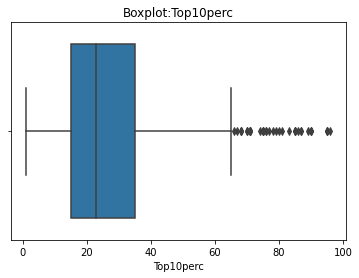

In [ ]:
plt.title('Boxplot:Top10perc')
sns.boxplot(data=Education,x='Top10perc')
plt.show()

###The box plot of the students from top 10 percentage of higher secondary class seems to have outliers. The percentage of new students from top 10% of Higher Secondary class ranges from 1 to 96. The mean percentage of new students from top 10% of Higher Secondary class is 27% and the median is 23%.The distribution is positively skewed. 

In [ ]:
Education['Top25perc'].describe()

count    777.000000
mean      55.796654
std       19.804778
min        9.000000
25%       41.000000
50%       54.000000
75%       69.000000
max      100.000000
Name: Top25perc, dtype: float64

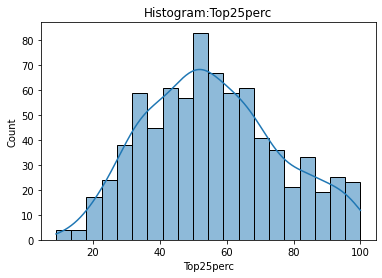

In [ ]:
plt.title('Histogram:Top25perc')
sns.histplot(data=Education,x='Top25perc', bins=20, kde=True)
plt.show()

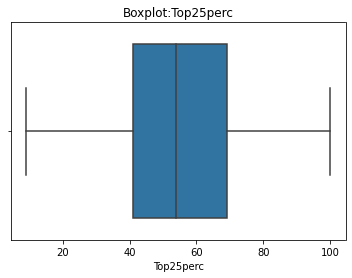

In [ ]:
plt.title('Boxplot:Top25perc')
sns.boxplot(data=Education,x='Top25perc')
plt.show()

###The box plot for the top 25% has no outliers. The percentage of new students from top 25% of Higher Secondary class ranges from 9 to 100. The mean percentage of new students from top 25% of Higher Secondary class is 55.7966% and the median is 54%. The distribution is normally distributed as the mean value and median value are almost same. 

In [ ]:
Education['P.Undergrad'].describe()

count      777.000000
mean       855.298584
std       1522.431887
min          1.000000
25%         95.000000
50%        353.000000
75%        967.000000
max      21836.000000
Name: P.Undergrad, dtype: float64

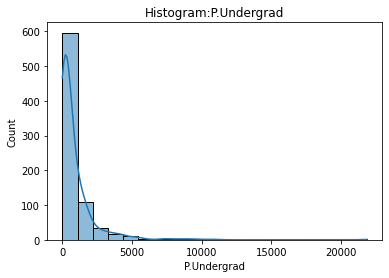

In [ ]:
plt.title('Histogram:P.Undergrad')
sns.histplot(data=Education,x='P.Undergrad', bins=20, kde=True)
plt.show()

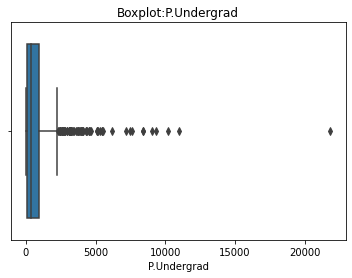

In [ ]:
plt.title('Boxplot:P.Undergrad')
sns.boxplot(data=Education,x='P.Undergrad')
plt.show()

###The box plot of the part time graduates has outliers. The Number of part-time undergraduate students ranges from 1 to 21836. The mean number of part time undergraduate students is 855.30 and the median is 353. The distribution is right skewed. 

In [ ]:
Education['F.Undergrad'].describe()

count      777.000000
mean      3699.907336
std       4850.420531
min        139.000000
25%        992.000000
50%       1707.000000
75%       4005.000000
max      31643.000000
Name: F.Undergrad, dtype: float64

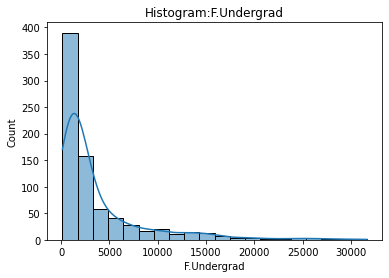

In [ ]:
plt.title('Histogram:F.Undergrad')
sns.histplot(data=Education,x='F.Undergrad', bins=20, kde=True)
plt.show() 

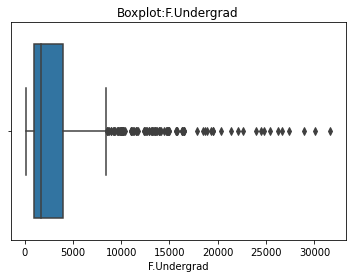

In [ ]:
plt.title('Boxplot:F.Undergrad')
sns.boxplot(data=Education,x='F.Undergrad')
plt.show() 

###The box plot of the part time graduates has outliers. The Number of full-time undergraduate students ranges from 139 to 31643. The mean number of part time undergraduate students is 3699.91 and the median is 1707. The distribution is right skewed. 

In [ ]:
Education['Room.Board'].describe()

count     777.000000
mean     4357.526384
std      1096.696416
min      1780.000000
25%      3597.000000
50%      4200.000000
75%      5050.000000
max      8124.000000
Name: Room.Board, dtype: float64

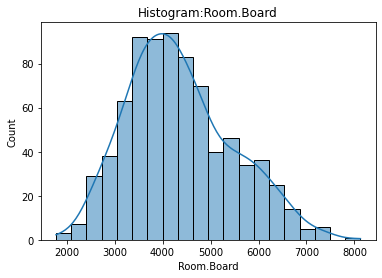

In [ ]:
plt.title('Histogram:Room.Board')
sns.histplot(data=Education,x='Room.Board', bins=20, kde=True)
plt.show()

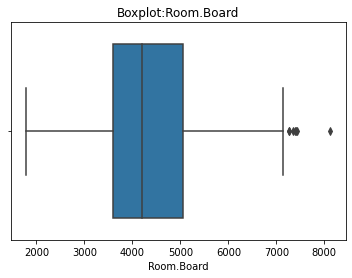

In [ ]:
plt.title('Boxplot:Room.Board')
sns.boxplot(data=Education,x='Room.Board')
plt.show()

###The Room board has few outliers. The cost of room and board ranges from 1780 to 8124.The mean cost of room and board is 4357.53 and the median is 4200. The mean and median are quite similar to each other. The distribution is normally distributed.


In [ ]:
Education['Books'].describe()

count     777.000000
mean      549.380952
std       165.105360
min        96.000000
25%       470.000000
50%       500.000000
75%       600.000000
max      2340.000000
Name: Books, dtype: float64

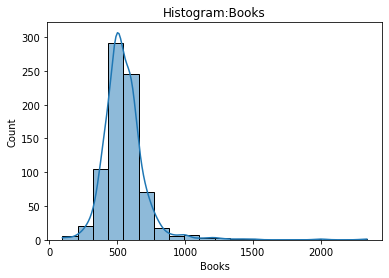

In [ ]:
plt.title('Histogram:Books')
sns.histplot(data=Education,x='Books', bins=20, kde=True)
plt.show()

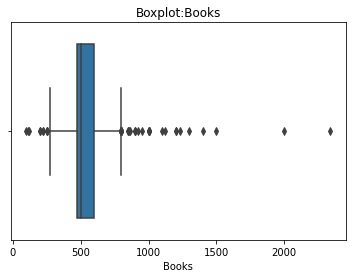

In [ ]:
plt.title('Boxplot:Books')
sns.boxplot(data=Education,x='Books')
plt.show()

###The Books has outliers. The estimated book costs for a student ranges from 96 to 2340. The mean cost of room and board is 549.38 and the median is 500. The mean and median are almost similar to each other. The distribution is normally distributed.

In [ ]:
Education['Personal'].describe()

count     777.000000
mean     1340.642214
std       677.071454
min       250.000000
25%       850.000000
50%      1200.000000
75%      1700.000000
max      6800.000000
Name: Personal, dtype: float64

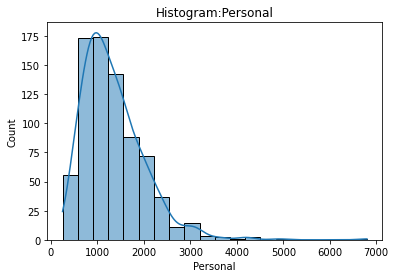

In [ ]:
plt.title('Histogram:Personal')
sns.histplot(data=Education,x='Personal', bins=20, kde=True)
plt.show()

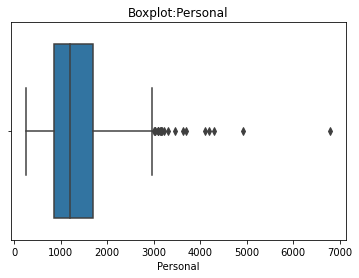

In [ ]:
plt.title('Boxplot:Personal')
sns.boxplot(data=Education,x='Personal')
plt.show()

###The box plot of personal expense has outliers. The estimated personal spending for a student ranges from 250 to 6800. The mean estimated personal spending for a student is 1340.64 and the median is 1200. The distribution is right skewed.

In [ ]:
Education['PhD'].describe()

count    777.000000
mean      72.624196
std       16.291967
min        8.000000
25%       62.000000
50%       75.000000
75%       85.000000
max      100.000000
Name: PhD, dtype: float64

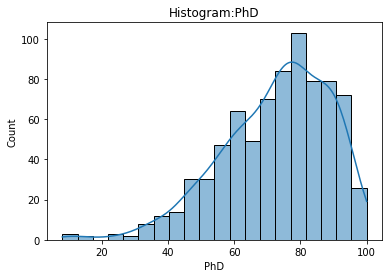

In [ ]:
plt.title('Histogram:PhD')
sns.histplot(data=Education,x='PhD', bins=20, kde=True)
plt.show()

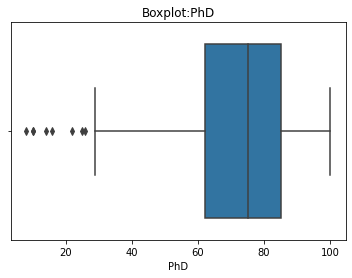

In [ ]:
plt.title('Boxplot:PhD')
sns.boxplot(data=Education,x='PhD')
plt.show()

###The box plot of Ph.D has outliers. The percentage of faculties with Ph.D.’s ranges from 8% to 100%.  The mean percentage of faculties with Ph.D.’s is 72.62% and the median is 75%.  The distribution is negatively skewed.

In [ ]:
Education['Terminal'].describe()

count    777.000000
mean      79.702703
std       14.722359
min       24.000000
25%       71.000000
50%       82.000000
75%       92.000000
max      100.000000
Name: Terminal, dtype: float64

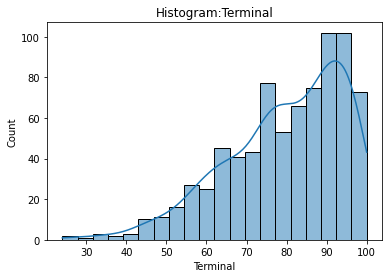

In [ ]:
plt.title('Histogram:Terminal')
sns.histplot(data=Education,x='Terminal', bins=20, kde=True)
plt.show()

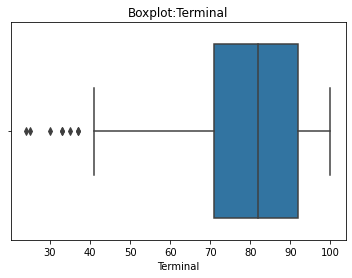

In [ ]:
plt.title('Boxplot:Terminal')
sns.boxplot(data=Education,x='Terminal')
plt.show()

###The box plot of terminal seems to have outliers in the dataset. The percentage of faculties with terminal degree ranges from 24% to 100%. The mean percentage of faculties with terminal degree is 79.70 % and the median is 82%. The distribution for the terminal is negatively skewed.

In [ ]:
Education['S.F.Ratio'].describe()

count    777.000000
mean      14.089704
std        3.958349
min        2.500000
25%       11.500000
50%       13.600000
75%       16.500000
max       39.800000
Name: S.F.Ratio, dtype: float64

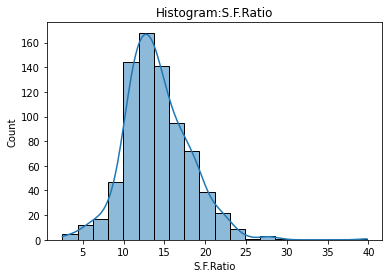

In [ ]:
plt.title('Histogram:S.F.Ratio')
sns.histplot(data=Education,x='S.F.Ratio', bins=20, kde=True)
plt.show()

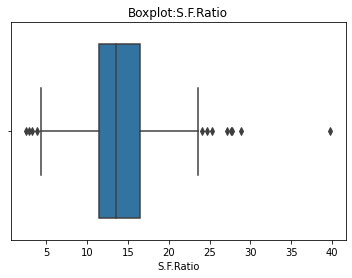

In [ ]:
plt.title('Boxplot:S.F.Ratio')
sns.boxplot(data=Education,x='S.F.Ratio')
plt.show()

###The S.F.Ratio variable also has outliers in the dataset. The student faculty ratio ranges from 2 to 39. The mean student faculty ratio is 14.09 and the median is 13.6. The mean is quite close to the median. The distribution is almost normally distributed.

In [ ]:
Education['perc.alumni'].describe()

count    777.000000
mean      22.743887
std       12.391801
min        0.000000
25%       13.000000
50%       21.000000
75%       31.000000
max       64.000000
Name: perc.alumni, dtype: float64

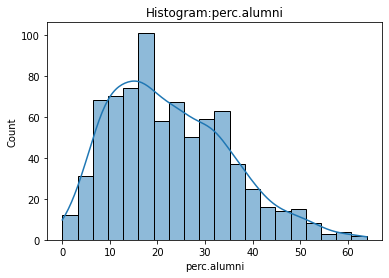

In [ ]:
plt.title('Histogram:perc.alumni')
sns.histplot(data=Education,x='perc.alumni', bins=20, kde=True)
plt.show()

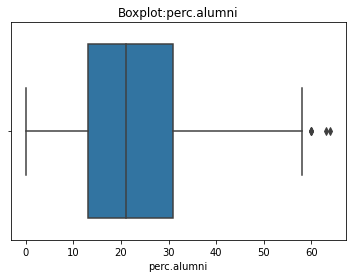

In [ ]:
plt.title('Boxplot:perc.alumni')
sns.boxplot(data=Education,x='perc.alumni')
plt.show()

###The perc.alumni box plot seems to have outliers in the dataset. The percentage of alumni who donate ranges from 0% to 64%. The mean percentage of alumni who donate is 22.74% and the median is 21%. The mean is quite close to the median. The distribution is normally distributed.

In [ ]:
Education['Expend'].describe()

count      777.000000
mean      9660.171171
std       5221.768440
min       3186.000000
25%       6751.000000
50%       8377.000000
75%      10830.000000
max      56233.000000
Name: Expend, dtype: float64

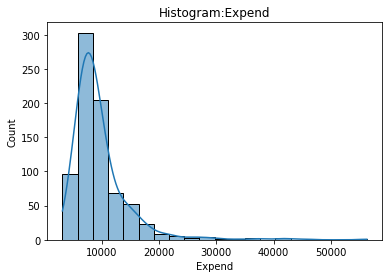

In [ ]:
plt.title('Histogram:Expend')
sns.histplot(data=Education,x='Expend', bins=20, kde=True)
plt.show()

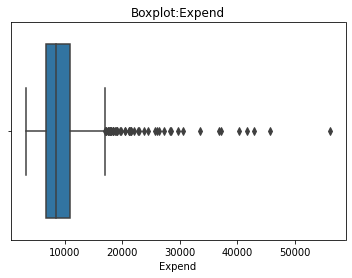

In [ ]:
plt.title('Boxplot:Expend')
sns.boxplot(data=Education,x='Expend')
plt.show()

###The expend variable also has outliers in the dataset. The instructional expenditure per student ranges from 3186 to 56233. The mean instructional expenditure per student is 9660.17 and the median is 8377. The distribution of the expenditure is positively skewed.

In [ ]:
Education['Grad.Rate'].describe()

count    777.000000
mean      65.395109
std       17.073737
min       10.000000
25%       53.000000
50%       65.000000
75%       78.000000
max      100.000000
Name: Grad.Rate, dtype: float64

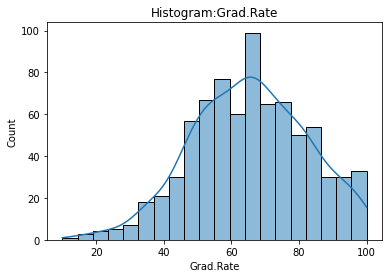

In [ ]:
plt.title('Histogram:Grad.Rate')
sns.histplot(data=Education,x='Grad.Rate', bins=20, kde=True)
plt.show()

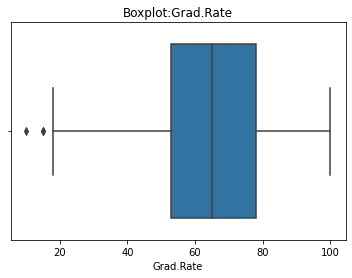

In [ ]:
plt.title('Boxplot:Grad.Rate')
sns.boxplot(data=Education,x='Grad.Rate')
plt.show()

###The box plot of Grad.Rate has outliers in the dataset. The graduation rate ranges from 10% to 100%. The mean graduation rate is 65.40% and the median is 65%. The mean is almost equal to the median. The distribution is normally distributed.

In [ ]:
Education['Outstate'].describe()

count      777.000000
mean     10440.669241
std       4023.016484
min       2340.000000
25%       7320.000000
50%       9990.000000
75%      12925.000000
max      21700.000000
Name: Outstate, dtype: float64

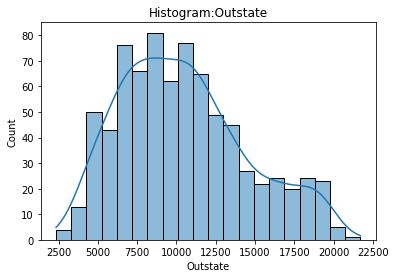

In [ ]:
plt.title('Histogram:Outstate')
sns.histplot(data=Education,x='Outstate', bins=20, kde=True)
plt.show()

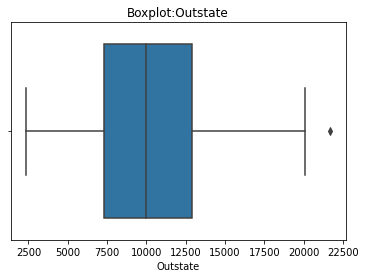

In [ ]:
plt.title('Boxplot:Outstate')
sns.boxplot(data=Education,x='Outstate')
plt.show()

###The box plot of outstate has only one outlier. The distribution is almost normally distributed. The number of students for whom the particular college or university is Out-of-state tuition ranges from 2340 to 21700. The mean number of students for whom the particular college or university is Out-of-state tuition is 10440.67 and the median is 9990. The mean is quite close to the median.

###Multivariate Analysis

In [ ]:
sns.pairplot(Education)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

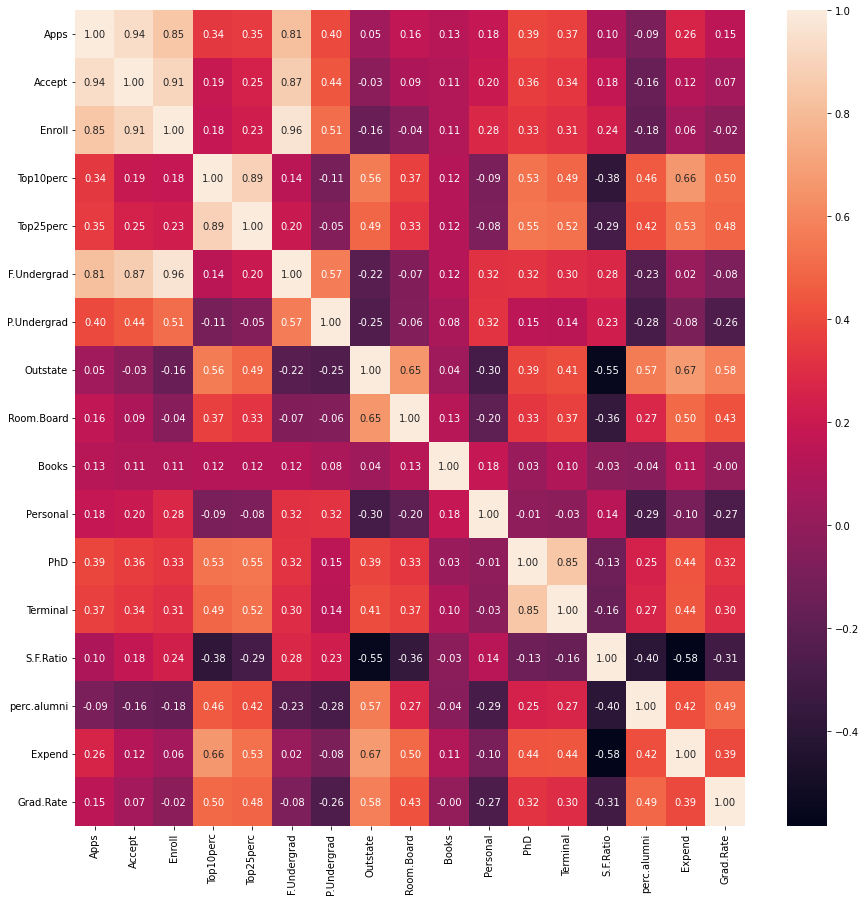

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(Education.corr(),annot=True,fmt=".2f");

###Scaling is necessary for PCA in this case. PCA is impacted by scaling. If variables in the data set have large differences in their variances, then all variables need to be scaled. Otherwise the variables(s) with larges variance will have disproportionately more influence on the construction of PCAs.

In [ ]:
Edu= Education.drop(['Names'], axis =1)
Edu.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [ ]:
from scipy.stats import zscore
Edu_scaled=Edu.apply(zscore)

In [ ]:
Edu_scaled.head().T

,0,1,2,3,4
Apps,-0.346882,-0.210884,-0.406866,-0.668261,-0.726176
Accept,-0.321205,-0.038703,-0.376318,-0.681682,-0.764555
Enroll,-0.063509,-0.288584,-0.478121,-0.692427,-0.780735
Top10perc,-0.258583,-0.655656,-0.315307,1.840231,-0.655656
Top25perc,-0.191827,-1.353911,-0.292878,1.677612,-0.596031
F.Undergrad,-0.168116,-0.209788,-0.549565,-0.658079,-0.711924
P.Undergrad,-0.209207,0.244307,-0.497090,-0.520752,0.009005
Outstate,-0.746356,0.457496,0.201305,0.626633,-0.716508
Room.Board,-0.964905,1.909208,-0.554317,0.996791,-0.216723
Books,-0.602312,1.215880,-0.905344,-0.602312,1.518912


In [ ]:
#Correlation Matrix
Edu_CorrMat = Edu_scaled.corr()
print (Edu_CorrMat)

                 Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.943451  0.846822   0.338834   0.351640     0.814491   
Accept       0.943451  1.000000  0.911637   0.192447   0.247476     0.874223   
Enroll       0.846822  0.911637  1.000000   0.181294   0.226745     0.964640   
Top10perc    0.338834  0.192447  0.181294   1.000000   0.891995     0.141289   
Top25perc    0.351640  0.247476  0.226745   0.891995   1.000000     0.199445   
F.Undergrad  0.814491  0.874223  0.964640   0.141289   0.199445     1.000000   
P.Undergrad  0.398264  0.441271  0.513069  -0.105356  -0.053577     0.570512   
Outstate     0.050159 -0.025755 -0.155477   0.562331   0.489394    -0.215742   
Room.Board   0.164939  0.090899 -0.040232   0.371480   0.331490    -0.068890   
Books        0.132559  0.113525  0.112711   0.118858   0.115527     0.115550   
Personal     0.178731  0.200989  0.280929  -0.093316  -0.080810     0.317200   
PhD          0.392980  0.357938  0.33348

In [ ]:
#Covariance Matrix
Edu_CovMat = np.cov(Edu_scaled.T)
print('Covariance Matrix \n%s', Edu_CovMat)

Covariance Matrix 
%s [[ 1.00128866e+00  9.44666359e-01  8.47913316e-01  3.39270321e-01
   3.52093041e-01  8.15540181e-01  3.98777500e-01  5.02236717e-02
   1.65151509e-01  1.32729421e-01  1.78961168e-01  3.93486554e-01
   3.69967622e-01  9.57562670e-02 -9.03421565e-02  2.59926503e-01
   1.46963658e-01]
 [ 9.44666359e-01  1.00128866e+00  9.12811453e-01  1.92694926e-01
   2.47794654e-01  8.75349854e-01  4.41839380e-01 -2.57877355e-02
   9.10157685e-02  1.13671647e-01  2.01247673e-01  3.58398858e-01
   3.38018401e-01  1.76456113e-01 -1.60196038e-01  1.24877730e-01
   6.54987779e-02]
 [ 8.47913316e-01  9.12811453e-01  1.00128866e+00  1.81527154e-01
   2.27037304e-01  9.65882744e-01  5.13729774e-01 -1.55677702e-01
  -4.02835287e-02  1.12856137e-01  2.81291483e-01  3.33915060e-01
   3.08671332e-01  2.37577072e-01 -1.81027112e-01  6.42519204e-02
  -2.14155645e-02]
 [ 3.39270321e-01  1.92694926e-01  1.81527154e-01  1.00128866e+00
   8.93144451e-01  1.41470801e-01 -1.05492050e-01  5.63055197e-

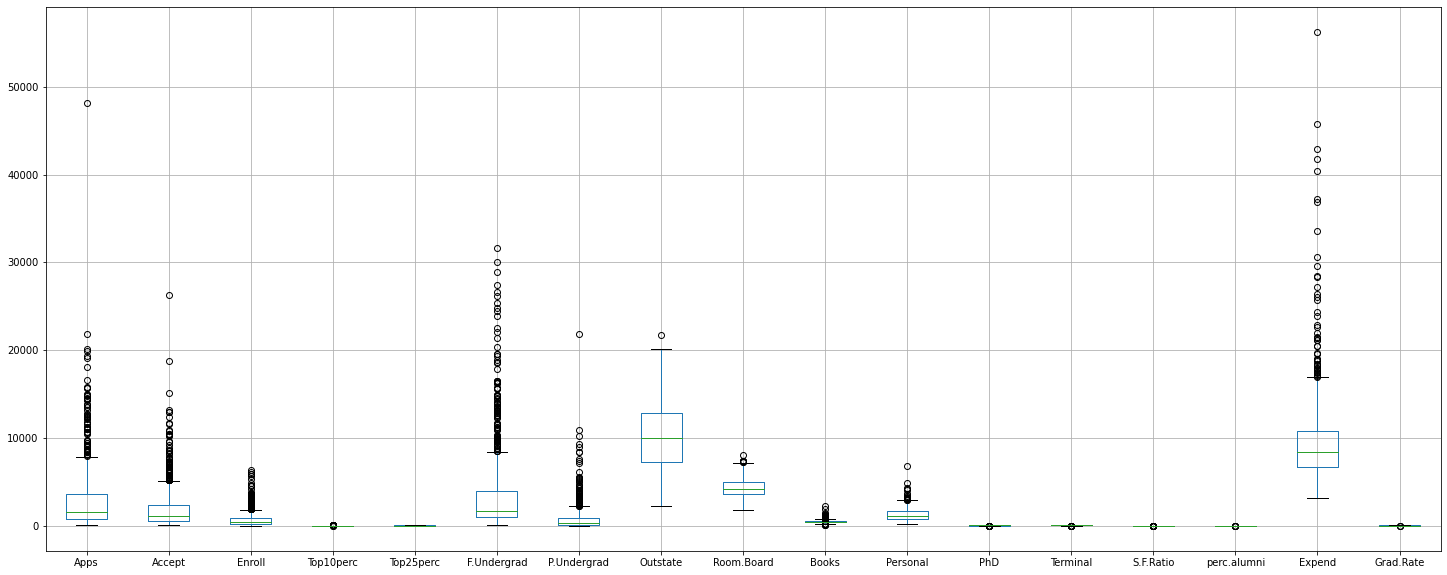

In [ ]:
Education.boxplot(figsize=(25,10))
plt.show()

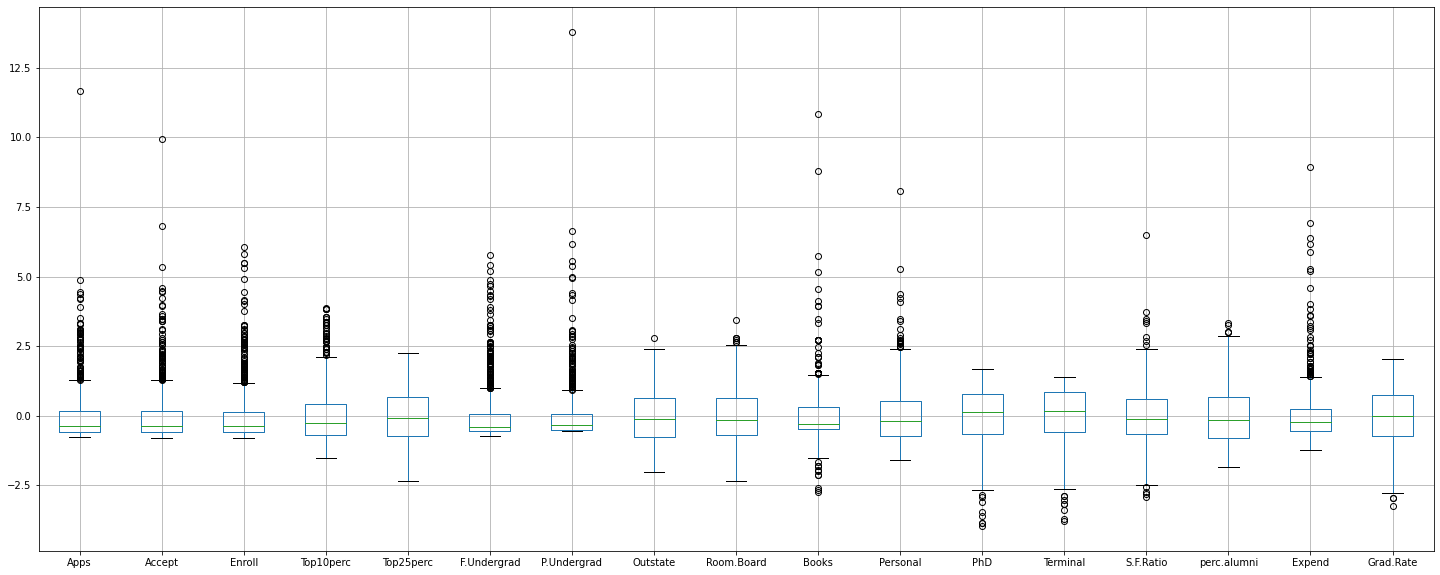

In [ ]:
Edu_scaled.boxplot(figsize=(25,10))
plt.show()

###From the above outputs I can see that even after scaling there are outliers present in the dataset. Because scaling of data does not remove the outliers, but only the range of the data changes.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=17, random_state=123)
pca_transformed = pca.fit_transform(Edu_scaled)

In [ ]:
##Extract eigen vectors
pca.components_

array([[ 2.47532537e-01,  2.06299756e-01,  1.75138842e-01,
         3.53990557e-01,  3.43702467e-01,  1.53527590e-01,
         2.57859287e-02,  2.94965994e-01,  2.48896885e-01,
         6.42827785e-02, -4.25981738e-02,  3.19579232e-01,
         3.16776477e-01, -1.77164491e-01,  2.05418014e-01,
         3.18605544e-01,  2.55626868e-01],
       [ 3.32426877e-01,  3.72875058e-01,  4.04250640e-01,
        -8.15077765e-02, -4.39140881e-02,  4.18089297e-01,
         3.15119134e-01, -2.48748173e-01, -1.36927922e-01,
         5.66066526e-02,  2.19634151e-01,  5.88540448e-02,
         4.70008357e-02,  2.46076655e-01, -2.46023579e-01,
        -1.30727369e-01, -1.68686285e-01],
       [-5.96777039e-02, -9.77593828e-02, -8.13575684e-02,
         3.42794420e-02, -2.55085723e-02, -6.05628562e-02,
         1.37966832e-01,  4.81491197e-02,  1.52143504e-01,
         6.79693620e-01,  4.95300078e-01, -1.31903121e-01,
        -7.09715596e-02, -2.91240091e-01, -1.47090056e-01,
         2.27918829e-01, -2.0

In [ ]:
#Extract eigen values
pca.explained_variance_

array([5.46384062, 4.4841809 , 1.17453449, 0.99793705, 0.93465879,
       0.84734458, 0.60586408, 0.58783511, 0.53014189, 0.40354672,
       0.3131535 , 0.22030447, 0.16777512, 0.14299858, 0.08806661,
       0.03671503, 0.02300969])

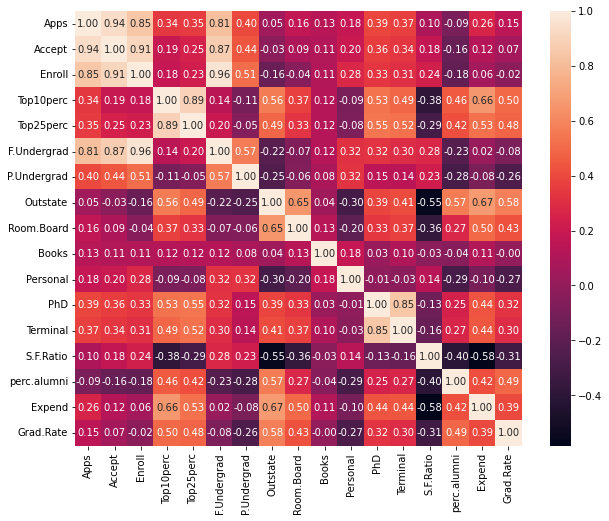

In [ ]:
#Check for presence of correlations
plt.figure(figsize = (10,8))
sns.heatmap(Edu_scaled.corr(), annot=True,fmt='.2f');

In [ ]:
!pip install factor_analyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41 kB 451 kB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.0-py3-none-any.whl size=41455 sha256=85158fcbf3acd1ba9e16e597e6ac4c2702a8d24a2d262b0629388684b64bbbf7
  Stored in directory: /root/.cache/pip/wheels/ac/00/37/1f0e8a5039f9e9f207c4405bbce0796f07701eb377bfc6cc76
Successfully built factor-analyzer


In [ ]:
#Confirm the statistical significance of correlations
#H0: Correlations are not significant, H1: There are significant correlations
#Reject H0 if p-value < 0.05
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(Edu_scaled)
p_value

0.0

In [ ]:
#Confirm the adequacy of sample size. 
#Note: Above 0.7 is good, below 0.5 is not acceptable
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(Edu_scaled)
kmo_model

0.8131776428730145

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=17, random_state=123)
pca_transformed = pca.fit_transform(Edu_scaled)

In [ ]:
pca.components_

array([[ 2.47532537e-01,  2.06299756e-01,  1.75138842e-01,
         3.53990557e-01,  3.43702467e-01,  1.53527590e-01,
         2.57859287e-02,  2.94965994e-01,  2.48896885e-01,
         6.42827785e-02, -4.25981738e-02,  3.19579232e-01,
         3.16776477e-01, -1.77164491e-01,  2.05418014e-01,
         3.18605544e-01,  2.55626868e-01],
       [ 3.32426877e-01,  3.72875058e-01,  4.04250640e-01,
        -8.15077765e-02, -4.39140881e-02,  4.18089297e-01,
         3.15119134e-01, -2.48748173e-01, -1.36927922e-01,
         5.66066526e-02,  2.19634151e-01,  5.88540448e-02,
         4.70008357e-02,  2.46076655e-01, -2.46023579e-01,
        -1.30727369e-01, -1.68686285e-01],
       [-5.96777039e-02, -9.77593828e-02, -8.13575684e-02,
         3.42794420e-02, -2.55085723e-02, -6.05628562e-02,
         1.37966832e-01,  4.81491197e-02,  1.52143504e-01,
         6.79693620e-01,  4.95300078e-01, -1.31903121e-01,
        -7.09715596e-02, -2.91240091e-01, -1.47090056e-01,
         2.27918829e-01, -2.0

In [ ]:
pca.explained_variance_ratio_

array([0.32098874, 0.26343587, 0.06900134, 0.05862663, 0.05490917,
       0.04977965, 0.0355932 , 0.03453403, 0.03114468, 0.02370749,
       0.01839709, 0.01294241, 0.00985642, 0.00840086, 0.00517372,
       0.00215693, 0.00135177])

In [ ]:
var_exp= pca.explained_variance_ratio_

In [ ]:
#exporting the data of the Principal Component (eigenvectors) into a data frame with the original features
df = pd.DataFrame(pca.components_.T,columns=list(Edu_scaled))
df

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,0.247533,0.332427,-0.059678,0.285097,0.000170,-0.012281,-0.030660,-0.103577,-0.089330,0.050736,0.043174,0.023386,0.597045,0.066050,0.132823,0.459050,0.359723
1,0.206300,0.372875,-0.097759,0.271788,0.050617,0.011277,-0.002812,-0.055528,-0.176711,0.040550,-0.058653,-0.146703,0.292920,0.026252,-0.144995,-0.517548,-0.544054
2,0.175139,0.404251,-0.081358,0.163457,-0.058798,-0.040120,-0.023540,0.058316,-0.128035,0.031462,-0.068365,0.012105,-0.446935,-0.073935,0.029958,-0.405328,0.609048
3,0.353991,-0.081508,0.034279,-0.055180,-0.394019,-0.054194,-0.164626,-0.129536,0.338332,0.064027,-0.008774,0.037884,-0.001603,-0.107537,0.698037,-0.147935,-0.144813
4,0.343702,-0.043914,-0.025509,-0.115855,-0.423913,0.030869,-0.125836,-0.108117,0.401042,0.014305,-0.274017,-0.091124,0.024861,0.149297,-0.617397,0.051906,0.080497
5,0.153528,0.418089,-0.060563,0.101292,-0.045408,-0.041727,-0.024012,0.078238,-0.059259,0.017491,-0.079953,0.057649,-0.525320,-0.042888,0.010032,0.560675,-0.414018
6,0.025786,0.315119,0.137967,-0.158951,0.306058,-0.193339,0.025111,0.570135,0.561029,-0.223975,0.102021,-0.062850,0.126510,0.019433,0.020998,-0.053128,0.008725
7,0.294966,-0.248748,0.048149,0.136572,0.220140,-0.026773,0.112136,0.014622,-0.001203,0.181787,0.146199,-0.822908,-0.145891,-0.025842,0.039539,0.102095,0.051413
8,0.248897,-0.136928,0.152144,0.191576,0.556677,0.167220,0.218058,-0.212996,0.280844,0.293449,-0.360912,0.352609,-0.071835,-0.057215,0.003699,-0.025662,0.001239
9,0.064283,0.056607,0.679694,0.071380,-0.131995,0.640262,-0.150371,0.207821,-0.135860,-0.085032,0.033481,-0.027690,0.009824,-0.068210,-0.009576,0.002851,0.000740


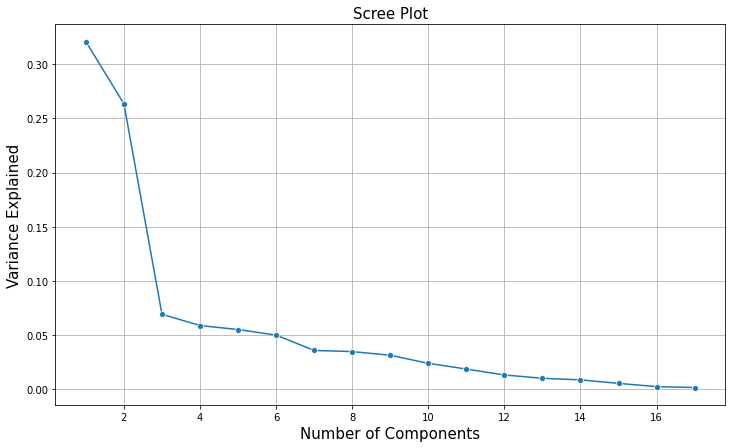

In [ ]:
plt.figure(figsize=(12,7))
sns.lineplot(y=var_exp,x=range(1,len(var_exp)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

In [ ]:
print('The Linear eq of 1st component: ')
for i in range(0,Edu_scaled.shape[1]):
    print('{} * {}'.format(np.round(pca.components_[0][i],3),Edu_scaled.columns[i]),end=' + ')

The Linear eq of 1st component: 
0.248 * Apps + 0.206 * Accept + 0.175 * Enroll + 0.354 * Top10perc + 0.344 * Top25perc + 0.154 * F.Undergrad + 0.026 * P.Undergrad + 0.295 * Outstate + 0.249 * Room.Board + 0.064 * Books + -0.043 * Personal + 0.32 * PhD + 0.317 * Terminal + -0.177 * S.F.Ratio + 0.205 * perc.alumni + 0.319 * Expend + 0.256 * Grad.Rate + 

In [ ]:
#Check the cumulative explained variance ratio to find a cut off for selecting the number of PCs
np.cumsum(pca.explained_variance_ratio_)

array([0.32098874, 0.58442461, 0.65342596, 0.71205259, 0.76696176,
       0.81674141, 0.8523346 , 0.88686863, 0.91801332, 0.94172081,
       0.96011789, 0.9730603 , 0.98291673, 0.99131758, 0.9964913 ,
       0.99864823, 1.        ])

###After analysing the dataset from the above processes I am reducing the variable numbers from 17 to 6.As a general rule 80-20 is taken, for choosing the number of principal components which are chosen from the cumulative variance explained. Here, I see that 81% is achieved after the 6th Eigen value, hence 6 principal components have been chosen. 

###The Eigenvectors determine the directions of the new attribute space, and the eigenvalues determine their magnitude. As can be seen in the PCA, the components of the eigen vectors determine the PCs. 

In [ ]:
pca = PCA(n_components=6, random_state=123)
pca_trans = pca.fit_transform(Edu_scaled)
pca_trans.transpose()

array([[-1.59178367e+00, -2.19726733e+00, -1.43106151e+00, ...,
        -7.35654959e-01,  7.92729370e+00, -4.57851961e-01],
       [ 7.62095222e-01, -5.82570548e-01, -1.09617695e+00, ...,
        -7.85324092e-02, -2.04892376e+00,  3.62098269e-01],
       [-1.16125321e-01,  2.31716748e+00, -4.34091528e-01, ...,
         1.60923954e-03,  2.08175826e+00, -1.33525267e+00],
       [-9.49497305e-01,  3.59195182e+00,  7.02472205e-01, ...,
         7.26782076e-02,  8.43396721e-01, -1.78424190e-01],
       [-7.24679783e-01,  9.84844680e-01, -3.79119636e-01, ...,
        -5.17643471e-01, -9.60284109e-01, -1.13325642e+00],
       [-3.13274583e-01, -1.26557398e-01, -9.47274775e-01, ...,
         4.72161888e-01, -2.06846796e+00,  8.32020244e-01]])

In [ ]:
pca.components_

array([[ 2.47532537e-01,  2.06299756e-01,  1.75138842e-01,
         3.53990557e-01,  3.43702467e-01,  1.53527590e-01,
         2.57859287e-02,  2.94965994e-01,  2.48896885e-01,
         6.42827785e-02, -4.25981738e-02,  3.19579232e-01,
         3.16776477e-01, -1.77164491e-01,  2.05418014e-01,
         3.18605544e-01,  2.55626868e-01],
       [ 3.32426877e-01,  3.72875058e-01,  4.04250640e-01,
        -8.15077765e-02, -4.39140881e-02,  4.18089297e-01,
         3.15119134e-01, -2.48748173e-01, -1.36927922e-01,
         5.66066526e-02,  2.19634151e-01,  5.88540448e-02,
         4.70008357e-02,  2.46076655e-01, -2.46023579e-01,
        -1.30727369e-01, -1.68686285e-01],
       [-5.96776944e-02, -9.77593933e-02, -8.13575785e-02,
         3.42794388e-02, -2.55085711e-02, -6.05628429e-02,
         1.37966830e-01,  4.81491219e-02,  1.52143503e-01,
         6.79693620e-01,  4.95300078e-01, -1.31903120e-01,
        -7.09715605e-02, -2.91240091e-01, -1.47090056e-01,
         2.27918828e-01, -2.0

In [ ]:
pca.explained_variance_ratio_

array([0.32098874, 0.26343587, 0.06900134, 0.05862663, 0.05490917,
       0.04977965])

In [ ]:
#Final dataframe with the selected eigen vectors
df_final = pd.DataFrame(pca.components_,columns=list(Edu_scaled))
df_final.T

,0,1,2,3,4,5
Apps,0.247533,0.332427,-0.059678,0.285097,0.000170,-0.012281
Accept,0.206300,0.372875,-0.097759,0.271788,0.050617,0.011277
Enroll,0.175139,0.404251,-0.081358,0.163457,-0.058798,-0.040120
Top10perc,0.353991,-0.081508,0.034279,-0.055180,-0.394019,-0.054194
Top25perc,0.343702,-0.043914,-0.025509,-0.115855,-0.423913,0.030869
F.Undergrad,0.153528,0.418089,-0.060563,0.101292,-0.045408,-0.041727
P.Undergrad,0.025786,0.315119,0.137967,-0.158951,0.306058,-0.193339
Outstate,0.294966,-0.248748,0.048149,0.136572,0.220140,-0.026773
Room.Board,0.248897,-0.136928,0.152144,0.191576,0.556677,0.167220
Books,0.064283,0.056607,0.679694,0.071380,-0.131995,0.640262


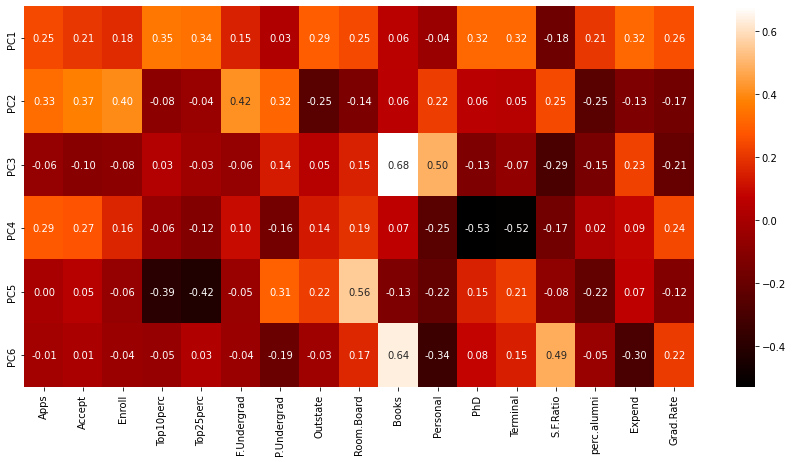

In [ ]:
plt.figure(figsize= (15,7))
sns.heatmap(df_final, cmap= 'gist_heat', annot = True, fmt = '.2f', yticklabels= ['PC1', 'PC2', 'PC3','PC4','PC5', 'PC6'])
plt.show()

##Business implication of using the Principal Component Analysis for this case study

###Principal Component Analysis is an unsupervised statistical technique algorithm. PCA is a “dimensionality reduction” method. It reduces the number of variables that are correlated to each other into fewer independent variables without losing the essence of these variables. It provides an overview of linear relationships between inputs and variables.
###In this case study, the data set consisted of 18 numbers of variables. Among those 17 variables are numerical variables and one is categorical. Performing PCA reduced the dimensionality of this large data set by transforming the set of attributes into a smaller one that still contained most of the information in the large set. 
###Smaller data sets are easier to analyze and faster for Machine Learning algorithms without extraneous variables to process. This has been simple to achieve in this data set as the data set contained a large number of correlated variables and PCA is a powerful tool which reduces this multicollinearity. Thus, in this case study, PCA has reduced the number of attributes of the data set, at the same time has retained as much information is possible. 
###Unsupervised learning like clustering can further be applied on the data to segment the universities/colleges based on the components created and further analyzed.  With this analysis I can perform further analysis and model building PCA which will improve the efficiency of machine learning models.